In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm
!pip install --force-reinstall gensim

  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.1
    Uninstalling pydantic_core-2.33.1:
      Successfully uninstalled pydantic_core-2.33.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.3
    Uninstalling pydantic-2.11.3:
      Successfully uninstalled pydantic-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires scipy, which is not installed.
albumentations 2.0.5 requires scipy>=1.10.0, which is not installed.

## Importing the necessary libraries

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import ngrams
import gensim.downloader as api

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## Change the display properties of pandas to max
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display')

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [ ]:
# Import the first file - True.csv
df_true_news = pd.read_csv("/content/drive/MyDrive/Data-For-Analysis/NLP/Assignment_Fake_News/True.csv")

# Import the second file - Fake.csv
df_fake_news = pd.read_csv("/content/drive/MyDrive/Data-For-Analysis/NLP/Assignment_Fake_News/Fake.csv")


## **1.** Data Preparation  <font color = red>[10 marks]</font>

1.   List item
2.   List item







### **1.0** Data Understanding

In [ ]:
# Inspect the DataFrame with True News to understand the given data
print(df_true_news.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017   


In [ ]:
# Inspect the DataFrame with Fake News to understand the given data
print(df_fake_news.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017  


In [ ]:
# Print the column details for True News DataFrame
print(df_true_news.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None


In [ ]:
# Print the column details for Fake News Dataframe
print(df_fake_news.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None


In [ ]:
# Print the column names of both DataFrames
print("True news Columns",df_true_news.columns)
print("Fake news Columns", df_fake_news.columns)

True news Columns Index(['title', 'text', 'date'], dtype='object')
Fake news Columns Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [ ]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_true_news["news_label"] = [1] * len(df_true_news)

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fake_news["news_label"] = [0] * len(df_fake_news)

# Print the column names of both DataFrames
print("True news Columns",df_true_news.columns)
print("Fake news Columns", df_fake_news.columns)


True news Columns Index(['title', 'text', 'date', 'news_label'], dtype='object')
Fake news Columns Index(['title', 'text', 'date', 'news_label'], dtype='object')


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [ ]:
print("Shape of True News",df_true_news.shape)
print("Shape of fake News",df_fake_news.shape)

Shape of True News (21417, 4)
Shape of fake News (23523, 4)


In [ ]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([df_true_news, df_fake_news], ignore_index=True)
print("shape of combined data frame", combined_df.shape)

shape of combined data frame (44940, 4)


In [ ]:
# Display the first 5 rows of the combined DataFrame to verify the result
print(combined_df.head())
print(combined_df.tail())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1  
                                                   title  \
44935  McPain: John McCain Furious That Iran Treat

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [ ]:
# Check Presence of Null Values
print(combined_df.isnull().sum())


title         21
text          21
date          42
news_label     0
dtype: int64


In [ ]:
# Handle Rows with Null Values
print("Shape before dropping na",combined_df.shape)

combined_df_clean = combined_df.dropna()

print("Shape after dropping na",combined_df_clean.shape)
print("Number of rows dropped",combined_df.shape[0]-combined_df_clean.shape[0])

Shape before dropping na (44940, 4)
Shape after dropping na (44898, 4)
Number of rows dropped 42


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [ ]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df_clean["news_text"] = combined_df_clean["title"] + " " + combined_df_clean["text"]

# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df_clean = combined_df_clean.drop(["date","title", "text"], axis=1)

# Display the first 5 rows of the updated DataFrame to check the result
print(combined_df_clean.head())


   news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [ ]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = combined_df_clean.copy()

# Add 'news_label' column in df_clean to the new dataframe for topic identification
#df_clean["news_label"] = None



#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers


def clean_text(text):
    # Convert to lower case
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # ?: The question mark ? makes the preceding quantifier (* in this case) "non-greedy." This is important! Without the ?,
    # .* would try to match as much as possible, potentially spanning across multiple sets of square brackets.
    # The ? ensures it matches the shortest possible string between an opening and a closing bracket.
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove words with numbers
    text = re.sub('\w*\d\w*', '', text)
    # Remove ' and "
    text = re.sub('[‘’“”…]', '', text)
    # Remove newline
    text = re.sub('\n', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text_tokens = word_tokenize(text)
    filtered_text_tokens = [word for word in text_tokens if word.lower() not in stop_words]
    text = ' '.join(filtered_text_tokens)

    return text



#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [ ]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean["news_text_clean"] = df_clean["news_text"].apply(clean_text)



### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

def pos_tagging_lemmatization(text):
  # do POS tagging
  doc = nlp(text)


  #filtering stopwords and keeping only NN and NNS tags
  filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and token.tag_ in ['NN', 'NNS','NNP']]
  filtered_text = " ".join(filtered_tokens)

  return filtered_text



In [ ]:

text ="SP Burhanpur Devendra Patidar said that on April 13, police received information about a body found in the bushes near the Indore-Ichhapur road opposite the ITI College."
filtered_text = pos_tagging_lemmatization(text)

doc= nlp(text)
# print word POS and tag
for token in doc:
    print(token.text,"....", token.pos_, "....",token.tag_,"......",token.lemma_)

#print("lemmatized text",lemmatized_text)
print("filtered text", filtered_text)

SP .... PROPN .... NNP ...... SP
Burhanpur .... PROPN .... NNP ...... Burhanpur
Devendra .... PROPN .... NNP ...... Devendra
Patidar .... PROPN .... NNP ...... Patidar
said .... VERB .... VBD ...... say
that .... SCONJ .... IN ...... that
on .... ADP .... IN ...... on
April .... PROPN .... NNP ...... April
13 .... NUM .... CD ...... 13
, .... PUNCT .... , ...... ,
police .... NOUN .... NNS ...... police
received .... VERB .... VBD ...... receive
information .... NOUN .... NN ...... information
about .... ADP .... IN ...... about
a .... DET .... DT ...... a
body .... NOUN .... NN ...... body
found .... VERB .... VBN ...... find
in .... ADP .... IN ...... in
the .... DET .... DT ...... the
bushes .... NOUN .... NNS ...... bush
near .... ADP .... IN ...... near
the .... DET .... DT ...... the
Indore .... PROPN .... NNP ...... Indore
- .... PUNCT .... HYPH ...... -
Ichhapur .... PROPN .... NNP ...... Ichhapur
road .... NOUN .... NN ...... road
opposite .... ADP .... IN ...... opposite
the 

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

df_clean["news_text_lemmatized"] = df_clean["news_text_clean"].apply(pos_tagging_lemmatization)


### Save the Cleaned data as a csv file (Recommended)

In [ ]:
## Recommended to perform the below steps to save time while rerunning the code
file_path = "/content/drive/MyDrive/Data-For-Analysis/NLP/Assignment_Fake_News/clean_df.csv"
df_clean.to_csv(file_path, index=False)


In [ ]:
df_clean.head()

,news_label,news_text,news_text_clean,news_text_lemmatized
0,1,"As U.S. budget fight looms, Republicans flip t...",us budget fight looms republicans flip fiscal ...,budget fight script washington reuters faction...
1,1,U.S. military to accept transgender recruits o...,us military accept transgender recruits monday...,military transgender recruit monday pentagon w...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,senior us republican senator let mr mueller jo...,republican senator mr mueller job washington r...
3,1,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat ti...,fbi russia probe diplomat tipoff nyt washingto...
4,1,Trump wants Postal Service to charge 'much mor...,trump wants postal service charge much amazon ...,trump service amazon shipments seattlewashingt...


In [ ]:
#file_path = "/content/drive/MyDrive/Data-For-Analysis/NLP/Assignment_Fake_News/clean_df.csv"
#df_clean = pd.read_csv(file_path)

In [ ]:
def shuffle_dataframe(df):
    """
    Shuffles the rows of a Pandas DataFrame.

    Args:
        df: The Pandas DataFrame to shuffle.

    Returns:
        A new Pandas DataFrame with the rows shuffled.  The original
        DataFrame is not modified.
    """
    # Create a copy to avoid modifying the original DataFrame
    df_shuffled = df.copy()

    # Use numpy.random.permutation to generate a random order of indices
    random_index = np.random.permutation(df.index)

    # Reindex the DataFrame with the random order
    df_shuffled = df_shuffled.reindex(random_index)

    return df_shuffled

In [ ]:
df_clean = shuffle_dataframe(df_clean)

In [ ]:
# Check the first few rows of the DataFrame
df_clean.head()


,news_label,news_text,news_text_clean,news_text_lemmatized
18453,1,"New 'walls' now divide Germany, president says...",new walls divide germany president says mainz ...,wall germany president mainz germany reuters g...
33569,0,WOW! FORMER AMBASSADOR TO RUSSIA Lists Failure...,wow former ambassador russia lists failures ob...,ambassador russia failure obama syria
19031,1,Iraqi soldiers join Turkish exercises near sha...,iraqi soldiers join turkish exercises near sha...,soldier exercise border witness habur turkey s...
4209,1,"Pence kicks off Japan talks, both sides seek '...",pence kicks japan talks sides seek near term r...,pence japan side term result tokyo vice presid...
4299,1,Sessions visits U.S.-Mexico border to push mig...,sessions visits usmexico border push migrant c...,session usmexico border crackdown ariz attorne...


In [ ]:
df_clean.tail()

,news_label,news_text,news_text_clean,news_text_lemmatized
14447,1,Haitian army set to make controversial return ...,haitian army set make controversial return two...,army return decade caphaitienportauprince reut...
25408,0,"After Telling 37 Lies In One Day, Trump Calls...",telling lies one day trump calls fact checkers...,lie day trump fact checker scum video donald t...
5710,1,"Tillerson calls counterparts from Mexico, Cana...",tillerson calls counterparts mexico canada sta...,tillerson counterpart mexico canada state depa...
34502,0,HE’S BACK! HILLARY’S COUGHING FIT Draws Her My...,hes back hillarys coughing fit draws mysteriou...,hillary handler shadowswho guy month people ma...
44902,0,ENCRYPTION TRUTH: What The FBI Aren’t Telling ...,encryption truth fbi arent telling battle appl...,encryption truth fbi battle apple san bernardi...


In [ ]:
# Check the dimensions of the DataFrame
print("Shape of the DataFrame:", df_clean.shape)

Shape of the DataFrame: (44898, 4)


In [ ]:
# Check the number of non-null entries and data types of each column
print("Deatails of Null Values \n", df_clean.isnull().sum())

Deatails of Null Values 
 news_label              0
news_text               0
news_text_clean         0
news_text_lemmatized    0
dtype: int64


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [ ]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_clean['news_text_clean'], df_clean['news_label'], test_size=0.3, random_state=42)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [ ]:
# Add a new column to calculate the character length of cleaned news text
df_clean["len_orig_text"] = df_clean['news_text'].apply(len)
# Add a new column to calculate the character length of cleaned news text
df_clean["len_clean_text"] = df_clean["news_text_clean"].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean["len_lam_text"] = df_clean['news_text_lemmatized'].apply(len)



In [ ]:
df_clean.head()

,news_label,news_text,news_text_clean,news_text_lemmatized,len_orig_text,len_clean_text,len_lam_text
18453,1,"New 'walls' now divide Germany, president says...",new walls divide germany president says mainz ...,wall germany president mainz germany reuters g...,3241,2290,1297
33569,0,WOW! FORMER AMBASSADOR TO RUSSIA Lists Failure...,wow former ambassador russia lists failures ob...,ambassador russia failure obama syria,75,55,37
19031,1,Iraqi soldiers join Turkish exercises near sha...,iraqi soldiers join turkish exercises near sha...,soldier exercise border witness habur turkey s...,1171,898,492
4209,1,"Pence kicks off Japan talks, both sides seek '...",pence kicks japan talks sides seek near term r...,pence japan side term result tokyo vice presid...,4142,2911,1688
4299,1,Sessions visits U.S.-Mexico border to push mig...,sessions visits usmexico border push migrant c...,session usmexico border crackdown ariz attorne...,2825,2100,1248


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

<Axes: xlabel='len_lam_text', ylabel='Count'>

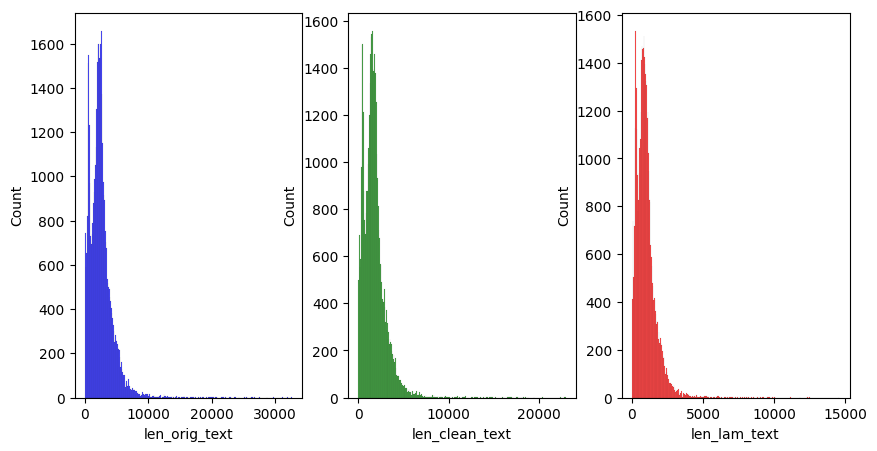

In [ ]:
# Create a histogram plot to visualise character lengths
fig,ax = plt.subplots(1,3,figsize=(10,5))

# Add histogram for orig news text
sns.histplot(df_clean["len_orig_text"], ax=ax[0], color='blue', alpha=0.7)
#ax[0].hist(df_clean["len_orig_text"], bins=100, color='blue', alpha=0.7)
# Add histogram for cleaned news text
#ax[1].hist(df_clean["len_clean_text"], bins=100, color='green', alpha=0.7)
sns.histplot(df_clean["len_clean_text"],ax=ax[1], color='green', alpha=0.7)
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(df_clean["len_lam_text"],ax=ax[2], color='red', alpha=0.7)
#ax[2].hist(df_clean["len_lam_text"], bins=100, color='red', alpha=0.7)

#

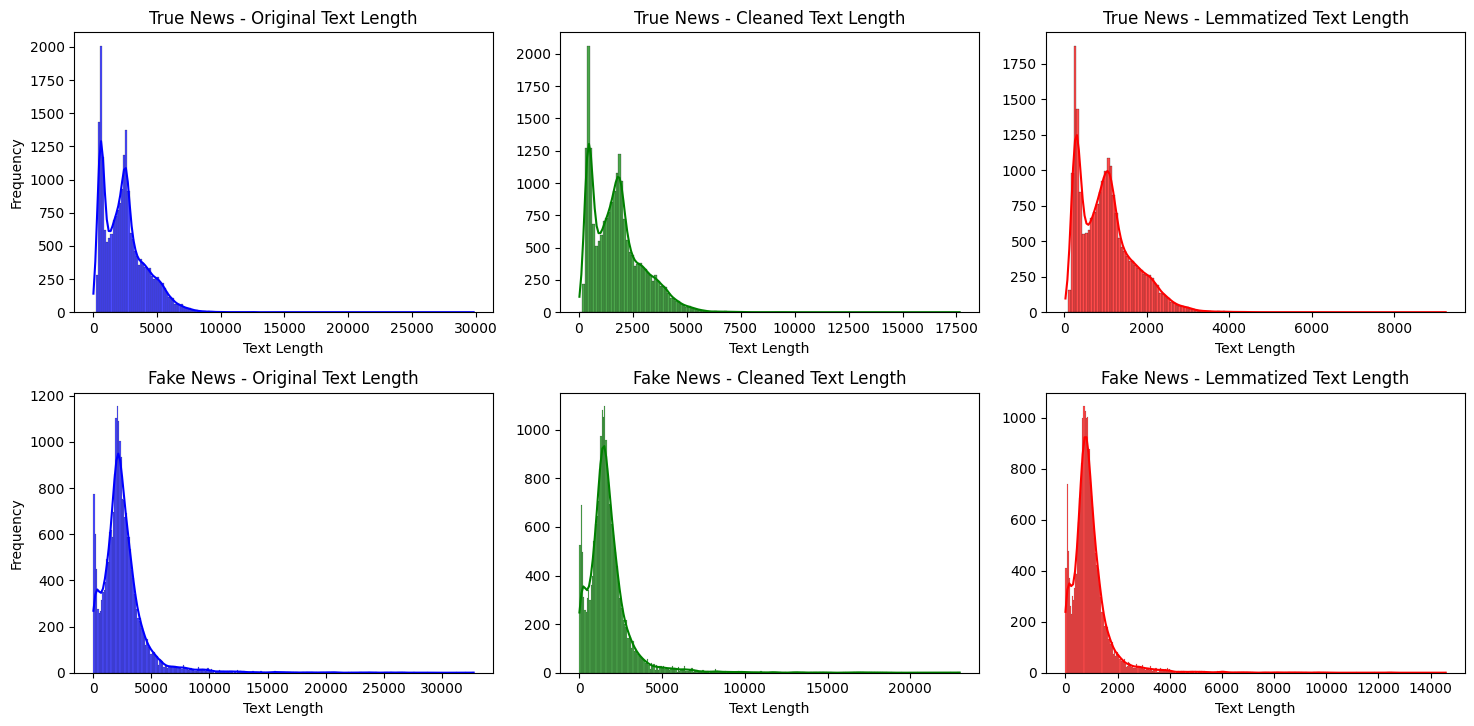

In [ ]:
ig, ax = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Distribution of Text Lengths for True and Fake News', fontsize=16)

condition_true = df_clean['news_label'] == 1
condition_fake = df_clean['news_label'] == 0

# Define colors
colors = ['blue', 'green', 'red']

# Histogram for true news
sns.histplot(df_clean.loc[condition_true, 'len_orig_text'], ax=ax[0, 0], color=colors[0], alpha=0.7, kde=True)
ax[0, 0].set_title('True News - Original Text Length')
ax[0, 0].set_xlabel('Text Length')
ax[0, 0].set_ylabel('Frequency')

sns.histplot(df_clean.loc[condition_true,'len_clean_text'], ax=ax[0, 1], color=colors[1], alpha=0.7, kde=True)
ax[0, 1].set_title('True News - Cleaned Text Length')
ax[0, 1].set_xlabel('Text Length')
ax[0, 1].set_ylabel('')

sns.histplot(df_clean.loc[condition_true, 'len_lam_text'], ax=ax[0, 2], color=colors[2], alpha=0.7, kde=True)
ax[0, 2].set_title('True News - Lemmatized Text Length')
ax[0, 2].set_xlabel('Text Length')
ax[0, 2].set_ylabel('')

# Histogram for fake news
sns.histplot(df_clean.loc[condition_fake, 'len_orig_text'], ax=ax[1, 0], color=colors[0], alpha=0.7, kde=True)
ax[1, 0].set_title('Fake News - Original Text Length')
ax[1, 0].set_xlabel('Text Length')
ax[1, 0].set_ylabel('Frequency')

sns.histplot(df_clean.loc[condition_fake, 'len_clean_text'], ax=ax[1, 1], color=colors[1], alpha=0.7, kde=True)
ax[1, 1].set_title('Fake News - Cleaned Text Length')
ax[1, 1].set_xlabel('Text Length')
ax[1, 1].set_ylabel('')

sns.histplot(df_clean.loc[condition_fake, 'len_lam_text'], ax=ax[1, 2], color=colors[2], alpha=0.7, kde=True)
ax[1, 2].set_title('Fake News - Lemmatized Text Length')
ax[1, 2].set_xlabel('Text Length')
ax[1, 2].set_ylabel('')

# Add a legend
#ax[0, 0].legend(['Original Text', 'Cleaned Text', 'Lemmatized Text'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

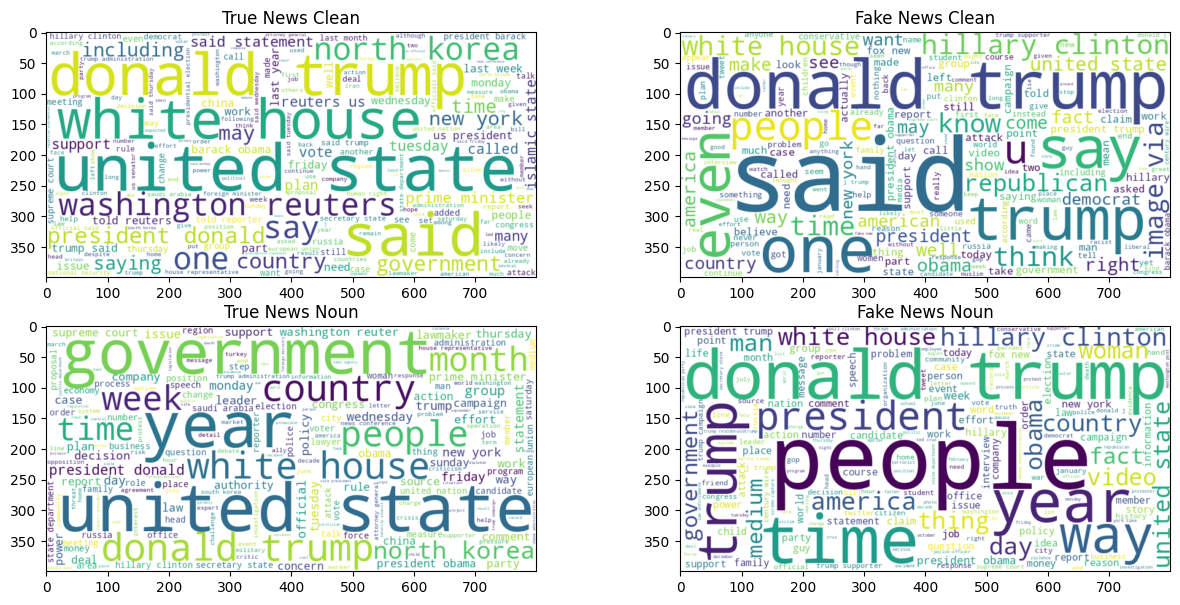

In [ ]:
# Filter news with label 1 (True News) and get the lemmatized text, news_text_clean
condition_true = df_clean['news_label'] == 1
true_news_text = df_clean.loc[condition_true, 'news_text_lemmatized']
true_clean_text = df_clean.loc[condition_true, 'news_text_clean']

# Filter news with label 0 (fake News) and get the lemmatized text, news_text_clean
condition_fake = df_clean['news_label'] == 0
fake_news_text = df_clean.loc[condition_fake, 'news_text_lemmatized']
fake_clean_text = df_clean.loc[condition_fake, 'news_text_clean']

# Combine the text of all true news articles into a single string
combined_true_new = ' '.join(true_news_text.astype(str).tolist())
combined_true_clean = ' '.join(true_clean_text.astype(str).tolist())

# Remove stop words from true_clean_text
#stop_words = set(stopwords.words('english'))
#true_clean_tokens = word_tokenize( ' '.join(true_clean_text.astype(str).tolist()))
#filtered_true_clean_tokens = [word for word in true_clean_tokens if word.lower() not in stop_words]
#combined_true_clean = ' '.join(filtered_true_clean_tokens)

# Combine the text of all fake news articles into a single string
combined_fake_new = ' '.join(fake_news_text.astype(str).tolist())
combined_fake_clean = ' '.join(fake_clean_text.astype(str).tolist())

# Remove stop words from fake_clean_text
#fake_clean_tokens = word_tokenize(' '.join(fake_clean_text.astype(str).tolist()))
#filtered_fake_clean_tokens = [word for word in fake_clean_tokens if word.lower() not in stop_words]
#combined_fake_clean = ' '.join(filtered_fake_clean_tokens)

# Generate word cloud for True News
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_true_new)
true_clean_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_true_clean)

# Generate word cloud for Fake News
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fake_new)
fake_clean_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fake_clean)

# Display the word cloud
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

ax[0, 0].imshow(true_clean_wordcloud, interpolation='bilinear')
ax[0, 0].set_title("True News Clean")

ax[0, 1].imshow(fake_clean_wordcloud, interpolation='bilinear')
ax[0, 1].set_title("Fake News Clean")

ax[1, 0].imshow(true_wordcloud, interpolation='bilinear')
ax[1, 0].set_title("True News Noun")

ax[1, 1].imshow(fake_wordcloud, interpolation='bilinear')
ax[1, 1].set_title("Fake News Noun")

plt.show()


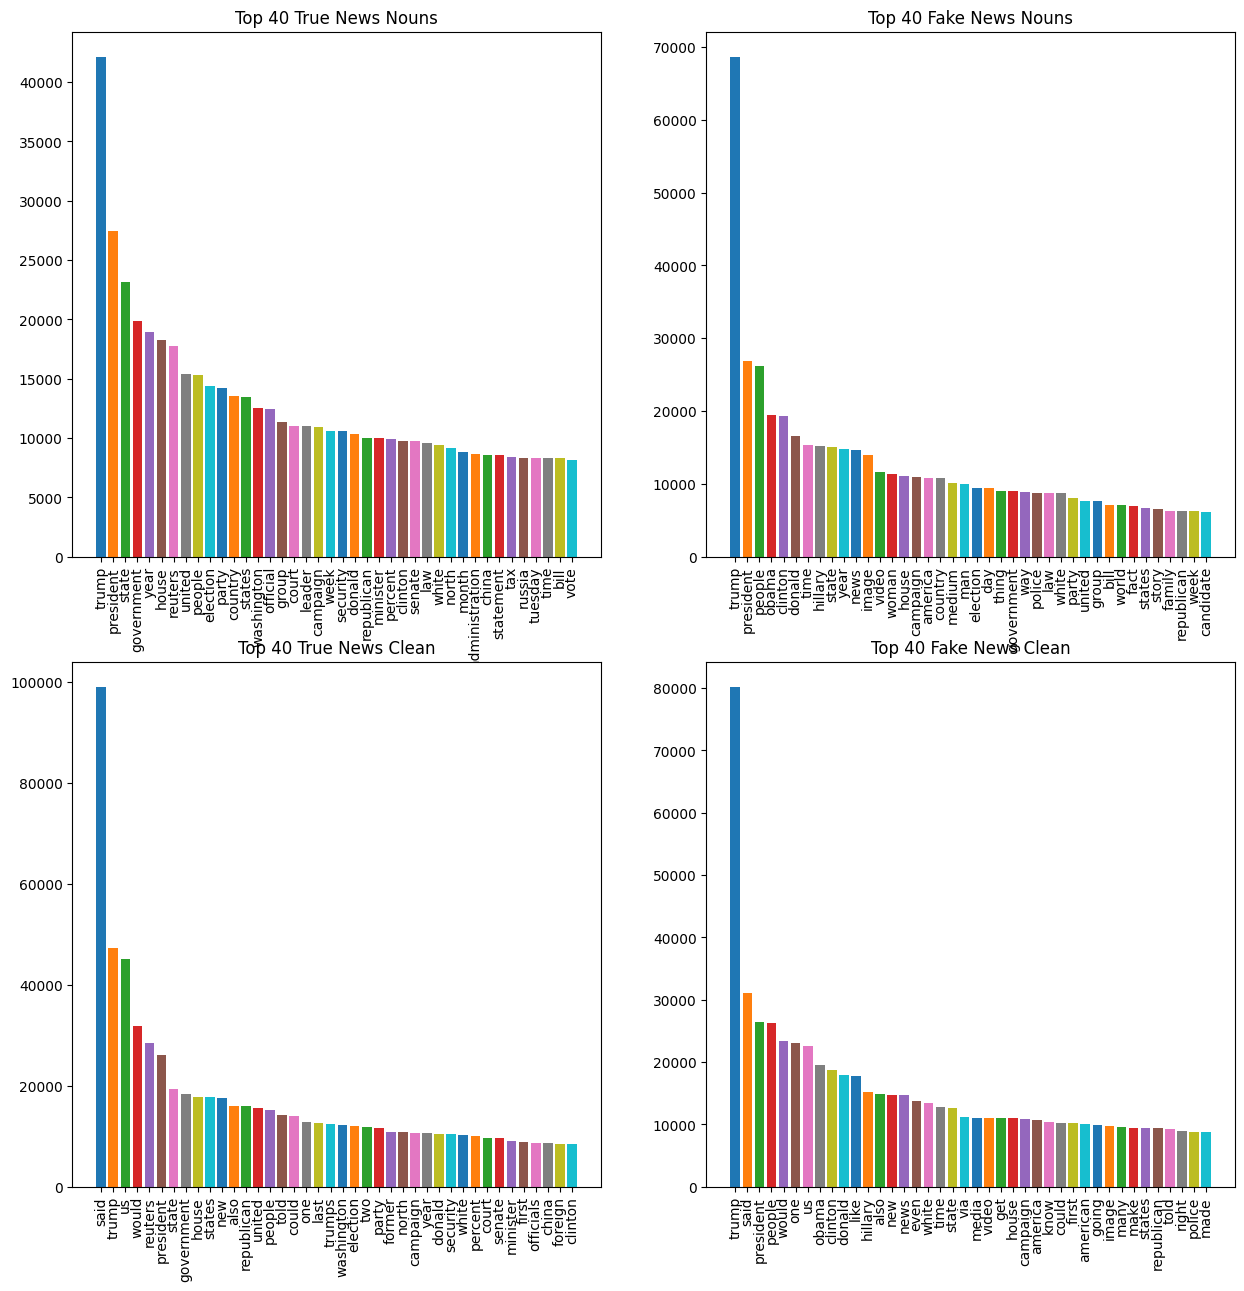

In [ ]:
true_word_tokens = word_tokenize(combined_true_new)
true_word_clean = word_tokenize(combined_true_clean)
fake_word_tokens = word_tokenize(combined_fake_new)
fake_word_clean = word_tokenize(combined_fake_clean)

true_word_frequency = Counter(true_word_tokens)
true_top_40 = true_word_frequency.most_common(40)

fake_word_frequency = Counter(fake_word_tokens)
fake_top_40 = fake_word_frequency.most_common(40)

true_clean_word_frequency = Counter(true_word_clean)
true_clean_top_40 = true_clean_word_frequency.most_common(40)

fake_clean_word_frequency = Counter(fake_word_clean)
fake_clean_top_40 = fake_clean_word_frequency.most_common(40)


# print top 40 words
#for word, frequency in true_top_40:
#    print(f"{word}: {frequency}")

# plot top 40 words x-axis word and y-axis frequecy

fig,ax = plt.subplots(2,2,figsize=(15,15))

[ax[0,0].bar(word, frequency) for word, frequency in true_top_40]
ax[0,0].set_title("Top 40 True News Nouns")
ax[0,0].xaxis.set_tick_params(rotation=90)
[ax[0,1].bar(word, frequency) for word, frequency in fake_top_40]
ax[0,1].set_title("Top 40 Fake News Nouns")
ax[0,1].xaxis.set_tick_params(rotation=90)

[ax[1,0].bar(word, frequency) for word, frequency in true_clean_top_40]
ax[1,0].set_title("Top 40 True News Clean")
ax[1,0].xaxis.set_tick_params(rotation=90)
[ax[1,1].bar(word, frequency) for word, frequency in fake_clean_top_40]
ax[1,1].set_title("Top 40 Fake News Clean")
ax[1,1].xaxis.set_tick_params(rotation=90)

plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

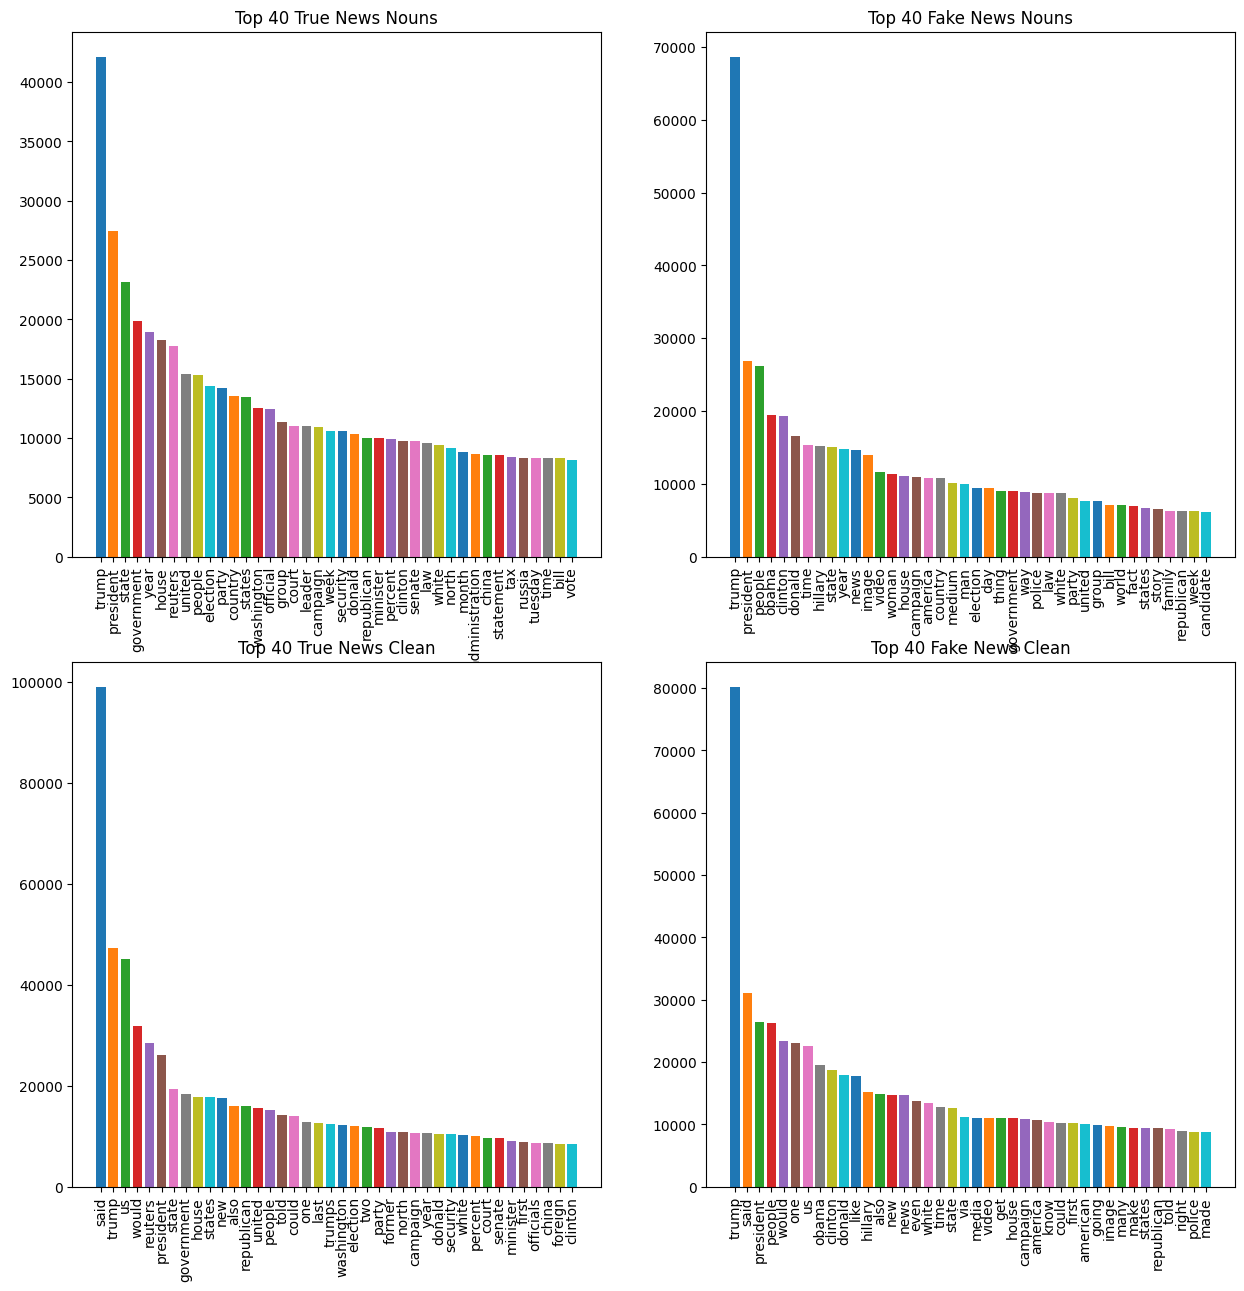

In [ ]:
# Covered in subplot of above graph

## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
true_word_tokens = word_tokenize(combined_true_new)
true_word_clean = word_tokenize(combined_true_clean)
fake_word_tokens = word_tokenize(combined_fake_new)
fake_word_clean = word_tokenize(combined_fake_clean)

true_word_frequency = Counter(true_word_tokens)
true_top_40 = true_word_frequency.most_common(40)

fake_word_frequency = Counter(fake_word_tokens)
fake_top_40 = fake_word_frequency.most_common(40)

true_clean_word_frequency = Counter(true_word_clean)
true_clean_top_40 = true_clean_word_frequency.most_common(40)

fake_clean_word_frequency = Counter(fake_word_clean)
fake_clean_top_40 = fake_clean_word_frequency.most_common(40)


# print top 40 words
#for word, frequency in true_top_40:
#    print(f"{word}: {frequency}")

# plot top 40 words x-axis word and y-axis frequecy

fig,ax = plt.subplots(2,2,figsize=(15,15))

[ax[0,0].bar(word, frequency) for word, frequency in true_top_40]
ax[0,0].set_title("Top 40 True News Nouns")
ax[0,0].xaxis.set_tick_params(rotation=90)
[ax[0,1].bar(word, frequency) for word, frequency in fake_top_40]
ax[0,1].set_title("Top 40 Fake News Nouns")
ax[0,1].xaxis.set_tick_params(rotation=90)

[ax[1,0].bar(word, frequency) for word, frequency in true_clean_top_40]
ax[1,0].set_title("Top 40 True News Clean")
ax[1,0].xaxis.set_tick_params(rotation=90)
[ax[1,1].bar(word, frequency) for word, frequency in fake_clean_top_40]
ax[1,1].set_title("Top 40 Fake News Clean")
ax[1,1].xaxis.set_tick_params(rotation=90)

plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write a function to get the specified top n-grams
def get_top_ngrams(text, n, top_n):
    if pd.isna(text) or text is None or not isinstance(text, str):  # Check for various NaN representations
        return []  # Return an empty list if text is NaN

    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, n)
    frequency = Counter(n_grams)
    return frequency.most_common(top_n)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [ ]:
# Handle NaN values in the text data
# In your get_top_ngrams function, add NaN handling:

def get_top_ngrams(text, n, top_n):
    if pd.isna(text) or text is None or not isinstance(text, str):  # Check for various NaN representations
        return []  # Return an empty list if text is NaN

    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, n)
    frequency = Counter(n_grams)
    return frequency.most_common(top_n)

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top Unigrams Noun  (True): [(('trump',), 42142), (('president',), 27424), (('state',), 23130), (('government',), 19854), (('year',), 18905), (('house',), 18281), (('reuters',), 17733), (('united',), 15388), (('people',), 15303), (('election',), 14421)]
Top Unigram Clean (True) : [(('said',), 99054), (('trump',), 47329), (('us',), 45169), (('would',), 31750), (('reuters',), 28464), (('president',), 26010), (('state',), 19370), (('government',), 18387), (('house',), 17843), (('states',), 17814)]


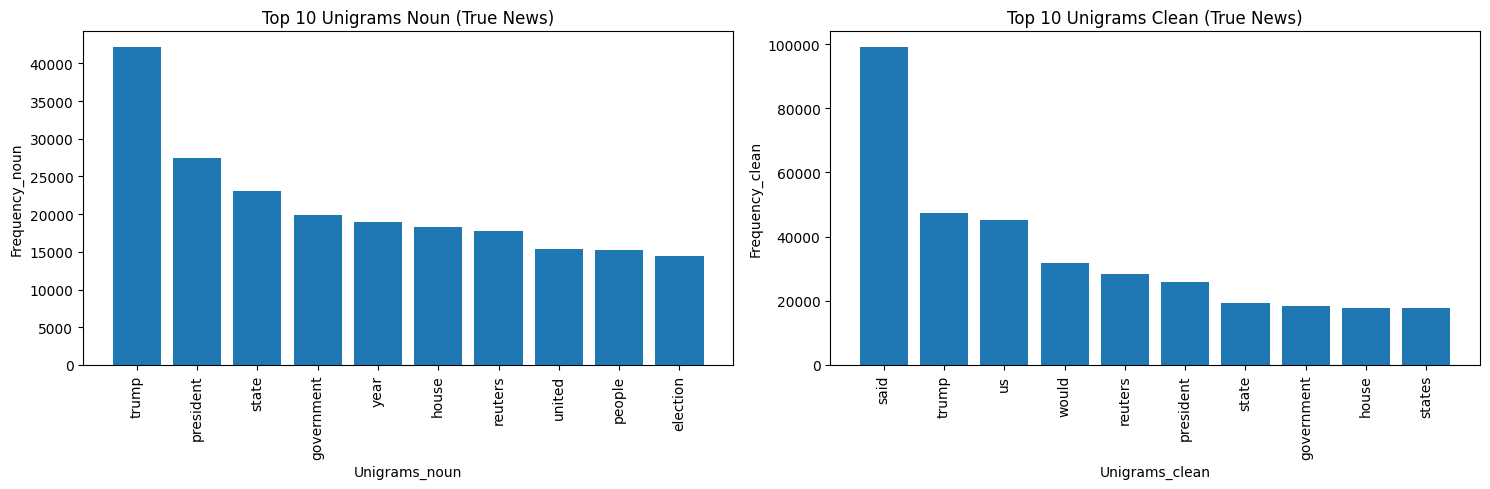

In [ ]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams_true = get_top_ngrams(combined_true_new, 1, 10)  # Top 10 unigrams
top_unigram_true_clean = get_top_ngrams(combined_true_clean, 1, 10)  # Top 10 unigrams
print("Top Unigrams Noun  (True):", top_unigrams_true)
print("Top Unigram Clean (True) :", top_unigram_true_clean)

# Plot bar graph of top_unigrams_true, x axis name and y-axis frequency
# Extract unigrams and frequencies for plotting
unigrams = [unigram[0][0] for unigram in top_unigrams_true]  # Get the unigram words
frequencies = [unigram[1] for unigram in top_unigrams_true] # Get the frequencies

unigrams_clean = [unigram[0][0] for unigram in top_unigram_true_clean]  # Get the unigram words
frequencies_clean = [unigram[1] for unigram in top_unigram_true_clean] # Get the frequencies

# Plot bar graph of top_unigrams_true, x axis name and y-axis frequency

fix,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].bar(unigrams, frequencies)  # Pass unigrams as x and frequencies as height
ax[0].set_xlabel("Unigrams_noun")
ax[0].set_ylabel("Frequency_noun")
ax[0].set_title("Top 10 Unigrams Noun (True News)")
ax[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

ax[1].bar(unigrams_clean, frequencies_clean)  # Pass unigrams as x and frequencies as height
ax[1].set_xlabel("Unigrams_clean")
ax[1].set_ylabel("Frequency_clean")
ax[1].set_title("Top 10 Unigrams Clean (True News)")
ax[1].tick_params(axis='x', rotation=90) # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top Bigrams Noun (True): [(('united', 'states'), 11903), (('white', 'house'), 8925), (('donald', 'trump'), 7819), (('north', 'korea'), 5950), (('president', 'donald'), 5929), (('new', 'york'), 4451), (('prime', 'minister'), 3708), (('washington', 'reuters'), 3671), (('supreme', 'court'), 2646), (('hillary', 'clinton'), 2375)]
Top Bigrams Clean (True): [(('united', 'states'), 12216), (('white', 'house'), 9075), (('donald', 'trump'), 8022), (('washington', 'reuters'), 6488), (('north', 'korea'), 5951), (('president', 'donald'), 5930), (('new', 'york'), 4445), (('prime', 'minister'), 4163), (('said', 'statement'), 3927), (('reuters', 'us'), 3659)]


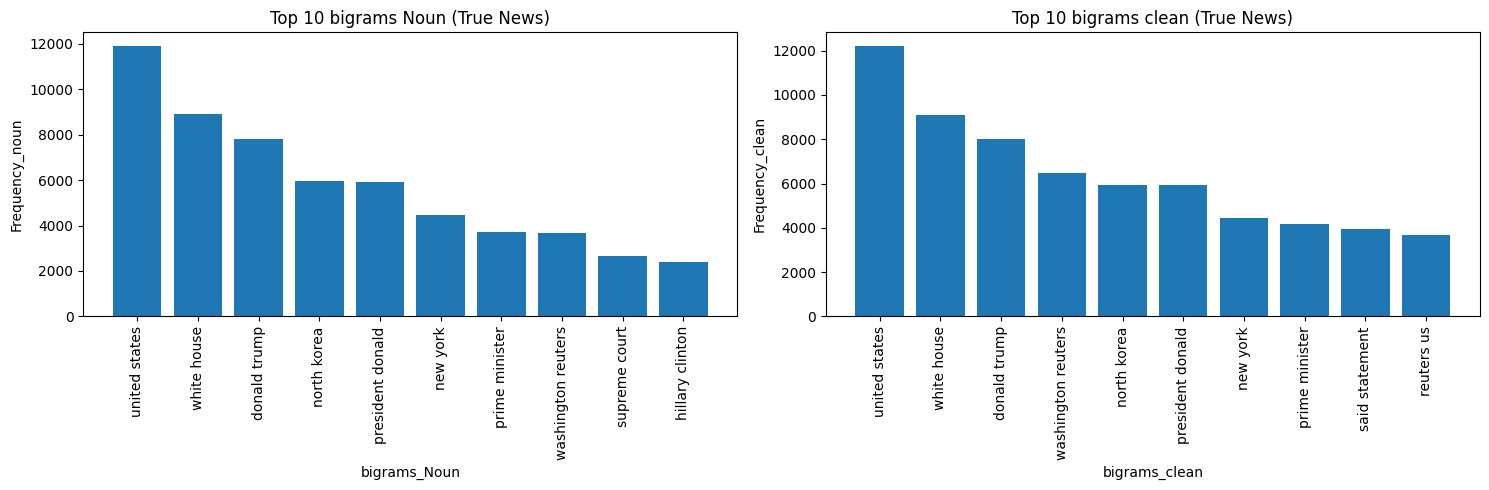

In [ ]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams_true = get_top_ngrams(combined_true_new, 2, 10)  # Top 10 bigrams
print("Top Bigrams Noun (True):", top_bigrams_true)

top_bigrams_true_clean = get_top_ngrams(combined_true_clean, 2, 10)  # Top 10 bigrams
print("Top Bigrams Clean (True):", top_bigrams_true_clean)

# plot bar graph
bigrams_noun = [bigram[0][0]+" "+bigram[0][1] for bigram in top_bigrams_true]  # Get the unigram words
frequencies_noun = [bigram[1] for bigram in top_bigrams_true] # Get the frequencies

bigrams_clean = [bigram[0][0]+" "+bigram[0][1] for bigram in top_bigrams_true_clean]  # Get the unigram words
frequencies_clean = [bigram[1] for bigram in top_bigrams_true_clean] # Get the frequencies

# Plot bar graph of top_unigrams_true, x axis name and y-axis frequency
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].bar(bigrams_noun, frequencies_noun)  # Pass unigrams as x and frequencies as height
ax[0].set_xlabel("bigrams_Noun")
ax[0].set_ylabel("Frequency_noun")
ax[0].set_title("Top 10 bigrams Noun (True News)")
ax[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

ax[1].bar(bigrams_clean, frequencies_clean)  # Pass unigrams as x and frequencies as height
ax[1].set_xlabel("bigrams_clean")
ax[1].set_ylabel("Frequency_clean")
ax[1].set_title("Top 10 bigrams clean (True News)")
ax[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability



plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top Trigrams Noun (True): [(('president', 'donald', 'trump'), 4417), (('president', 'donald', 'trumps'), 1307), (('president', 'vladimir', 'putin'), 782), (('reuters', 'president', 'donald'), 725), (('washington', 'reuters', 'president'), 702), (('george', 'w', 'bush'), 605), (('washington', 'president', 'donald'), 589), (('speaker', 'paul', 'ryan'), 589), (('new', 'york', 'reuters'), 586), (('prime', 'minister', 'theresa'), 583)]
Top Trigrams Clean (True): [(('president', 'donald', 'trump'), 4429), (('us', 'president', 'donald'), 2535), (('washington', 'reuters', 'us'), 2358), (('president', 'barack', 'obama'), 1993), (('president', 'donald', 'trumps'), 1428), (('reuters', 'us', 'president'), 1011), (('white', 'house', 'said'), 959), (('president', 'barack', 'obamas'), 910), (('us', 'house', 'representatives'), 780), (('president', 'vladimir', 'putin'), 769)]


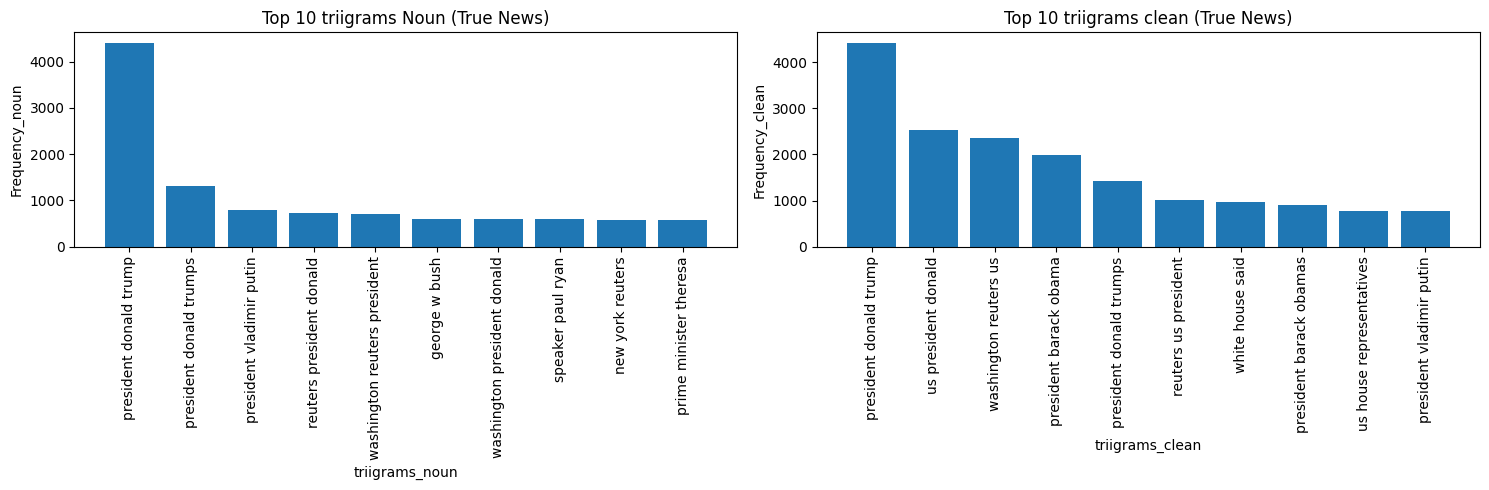

In [ ]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams_true = get_top_ngrams(combined_true_new, 3, 10)  # Top 10 trigrams
print("Top Trigrams Noun (True):", top_trigrams_true)

top_trigrams_true_clean = get_top_ngrams(combined_true_clean, 3, 10)  # Top 10 trigrams
print("Top Trigrams Clean (True):", top_trigrams_true_clean)


# Plot bar graph

trigrams_noun = [trigram[0][0]+" "+trigram[0][1]+" "+trigram[0][2] for trigram in top_trigrams_true]  # Get the trigram words
frequencies_noun = [trigram[1] for trigram in top_trigrams_true] # Get the frequencies

trigrams_clean = [trigram[0][0]+" "+trigram[0][1]+" "+trigram[0][2] for trigram in top_trigrams_true_clean]  # Get the trigram words
frequencies_clean = [trigram[1] for trigram in top_trigrams_true_clean] # Get the frequencies

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(trigrams_noun, frequencies_noun)  # Pass unigrams as x and frequencies as height
ax[0].set_xlabel("triigrams_noun")
ax[0].set_ylabel("Frequency_noun")
ax[0].set_title("Top 10 triigrams Noun (True News)")
ax[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

ax[1].bar(trigrams_clean, frequencies_clean)  # Pass unigrams as x and frequencies as height
ax[1].set_xlabel("triigrams_clean")
ax[1].set_ylabel("Frequency_clean")
ax[1].set_title("Top 10 triigrams clean (True News)")
ax[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability


plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top Unigrams Noun (Fake): [(('trump',), 68654), (('president',), 26898), (('people',), 26239), (('obama',), 19503), (('clinton',), 19284), (('donald',), 16594), (('time',), 15323), (('hillary',), 15160), (('state',), 14991), (('year',), 14800)]
Top Unigram Clean (Fake) : [(('trump',), 80234), (('said',), 31063), (('president',), 26379), (('people',), 26253), (('would',), 23452), (('one',), 23087), (('us',), 22600), (('obama',), 19477), (('clinton',), 18645), (('donald',), 17863)]


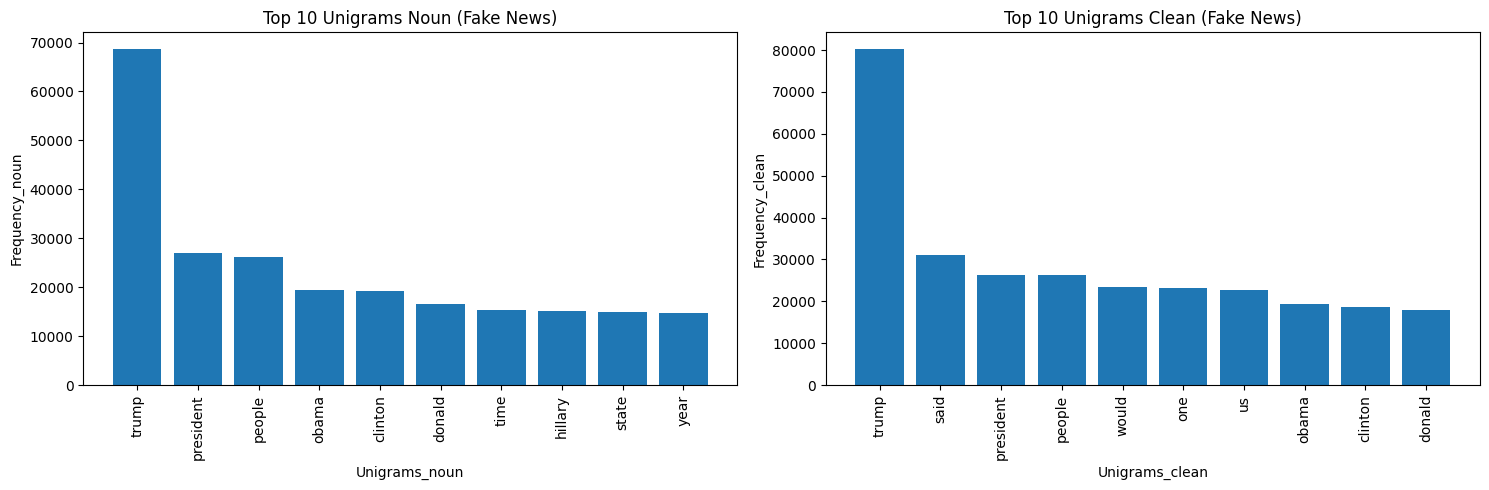

In [ ]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(combined_fake_new, 1, 10)  # Top 10 unigrams
print("Top Unigrams Noun (Fake):", top_unigrams_fake)

top_unigram_fake_clean = get_top_ngrams(combined_fake_clean, 1, 10)  # Top 10 unigrams
print("Top Unigram Clean (Fake) :", top_unigram_fake_clean)


# Plot bar graph
unigrams_noun = [unigram[0][0] for unigram in top_unigrams_fake]  # Get the unigram words
frequencies_noun = [unigram[1] for unigram in top_unigrams_fake] # Get the frequencies

unigrams_clean = [unigram[0][0] for unigram in top_unigram_fake_clean]  # Get the unigram words
frequencies_clean = [unigram[1] for unigram in top_unigram_fake_clean] # Get the frequencies

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(unigrams_noun, frequencies_noun)  # Pass unigrams as x and frequencies as height
ax[0].set_xlabel("Unigrams_noun")
ax[0].set_ylabel("Frequency_noun")
ax[0].set_title("Top 10 Unigrams Noun (Fake News)")
ax[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

ax[1].bar(unigrams_clean, frequencies_clean)  # Pass unigrams as x and frequencies as height
ax[1].set_xlabel("Unigrams_clean")
ax[1].set_ylabel("Frequency_clean")
ax[1].set_title("Top 10 Unigrams Clean (Fake News)")
ax[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top Bigrams Noun (Fake): [(('donald', 'trump'), 12558), (('hillary', 'clinton'), 6993), (('white', 'house'), 6287), (('united', 'states'), 5937), (('president', 'obama'), 4821), (('new', 'york'), 4214), (('president', 'trump'), 3478), (('fox', 'news'), 3356), (('trump', 'supporter'), 2259), (('j', 'trump'), 2115)]
Top Bigrams clean (Fake): [(('donald', 'trump'), 13700), (('hillary', 'clinton'), 6931), (('white', 'house'), 6555), (('image', 'via'), 6188), (('united', 'states'), 6074), (('new', 'york'), 4214), (('president', 'trump'), 3997), (('president', 'obama'), 3928), (('fox', 'news'), 3467), (('barack', 'obama'), 2271)]


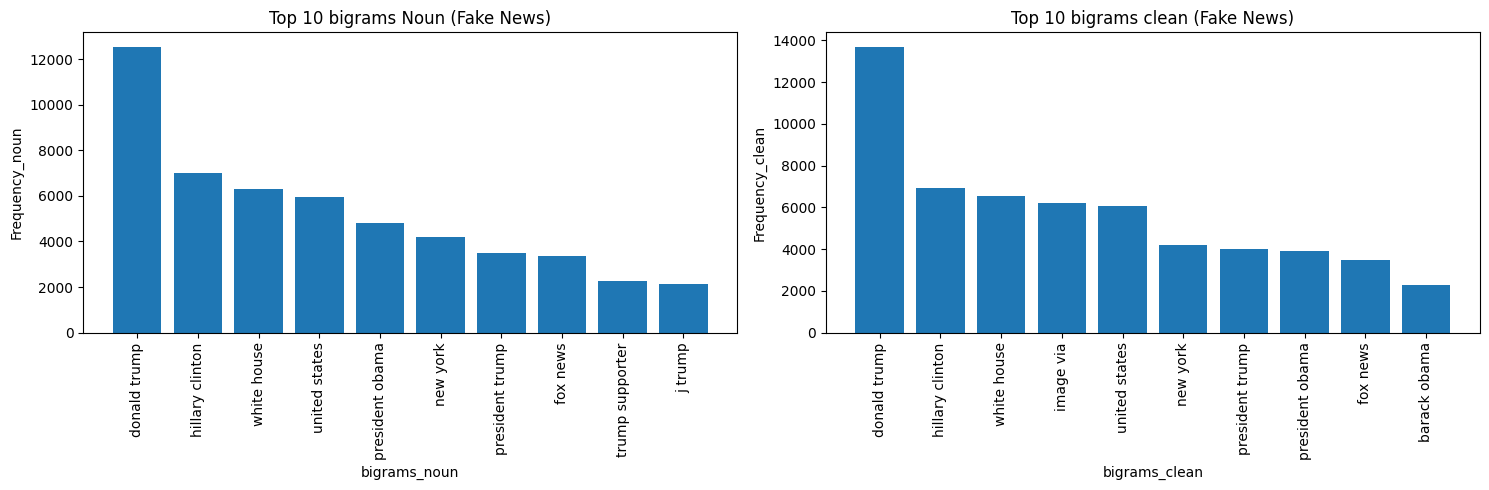

In [ ]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(combined_fake_new, 2, 10)  # Top 10 bigrams
print("Top Bigrams Noun (Fake):", top_bigrams_fake)

top_bigrams_fake_clean = get_top_ngrams(combined_fake_clean, 2, 10)
print("Top Bigrams clean (Fake):", top_bigrams_fake_clean)


# plot bar graph
bigrams_noun = [bigram[0][0]+" "+bigram[0][1] for bigram in top_bigrams_fake]  # Get the unigram words
frequencies_noun = [bigram[1] for bigram in top_bigrams_fake] # Get the frequencies

bigrams_clean = [bigram[0][0]+" "+bigram[0][1] for bigram in top_bigrams_fake_clean]  # Get the unigram words
frequencies_clean = [bigram[1] for bigram in top_bigrams_fake_clean] # Get the frequencies

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(bigrams_noun, frequencies_noun)  # Pass unigrams as x and frequencies as height
ax[0].set_xlabel("bigrams_noun")
ax[0].set_ylabel("Frequency_noun")
ax[0].set_title("Top 10 bigrams Noun (Fake News)")
ax[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

ax[1].bar(bigrams_clean, frequencies_clean)  # Pass unigrams as x and frequencies as height
ax[1].set_xlabel("bigrams_clean")
ax[1].set_ylabel("Frequency_clean")
ax[1].set_title("Top 10 bigrams clean (Fake News)")
ax[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top Trigrams Noun (Fake): [(('donald', 'j', 'trump'), 1799), (('j', 'trump', 'realdonaldtrump'), 1692), (('new', 'york', 'times'), 1487), (('news', 'century', 'wire'), 943), (('president', 'united', 'states'), 909), (('president', 'donald', 'trump'), 909), (('video', 'screen', 'capture'), 728), (('image', 'video', 'screen'), 683), (('new', 'york', 'city'), 609), (('george', 'w', 'bush'), 579)]
Top Trigrams clean (Fake): [(('donald', 'j', 'trump'), 2120), (('j', 'trump', 'realdonaldtrump'), 1692), (('new', 'york', 'times'), 1489), (('black', 'lives', 'matter'), 1365), (('news', 'century', 'wire'), 941), (('president', 'united', 'states'), 900), (('president', 'donald', 'trump'), 881), (('president', 'barack', 'obama'), 856), (('image', 'via', 'video'), 786), (('century', 'wire', 'says'), 727)]


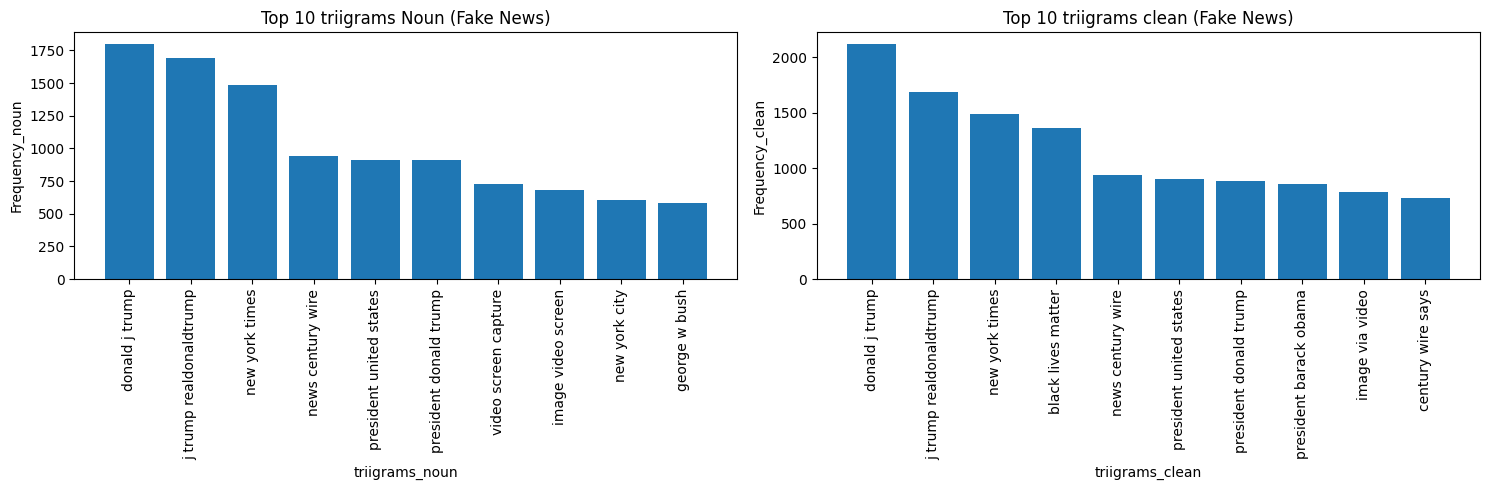

In [ ]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(combined_fake_new, 3, 10)  # Top 10 trigrams
print("Top Trigrams Noun (Fake):", top_trigrams_fake)

top_trigrams_fake_clean = get_top_ngrams(combined_fake_clean, 3, 10)  # Top 10 trigrams
print("Top Trigrams clean (Fake):", top_trigrams_fake_clean)

trigrams_noun = [trigram[0][0]+" "+trigram[0][1]+" "+trigram[0][2] for trigram in top_trigrams_fake]  # Get the trigram words
frequencies_noun = [trigram[1] for trigram in top_trigrams_fake] # Get the frequencies

trigrams_clean = [trigram[0][0]+" "+trigram[0][1]+" "+trigram[0][2] for trigram in top_trigrams_fake_clean]  # Get the trigram words
frequencies_clean = [trigram[1] for trigram in top_trigrams_fake_clean] # Get the frequencies

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(trigrams_noun, frequencies_noun)  # Pass unigrams as x and frequencies as height
ax[0].set_xlabel("triigrams_noun")
ax[0].set_ylabel("Frequency_noun")
ax[0].set_title("Top 10 triigrams Noun (Fake News)")
ax[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

ax[1].bar(trigrams_clean, frequencies_clean)  # Pass unigrams as x and frequencies as height
ax[1].set_xlabel("triigrams_clean")
ax[1].set_ylabel("Frequency_clean")
ax[1].set_title("Top 10 triigrams clean (Fake News)")
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
# Already added above in data frame df_clean
print("Columns in df_clean: \n",df_clean.columns)


Columns in df_clean: 
 Index(['news_label', 'news_text', 'news_text_clean', 'news_text_lemmatized',
       'len_orig_text', 'len_clean_text', 'len_lam_text'],
      dtype='object')


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

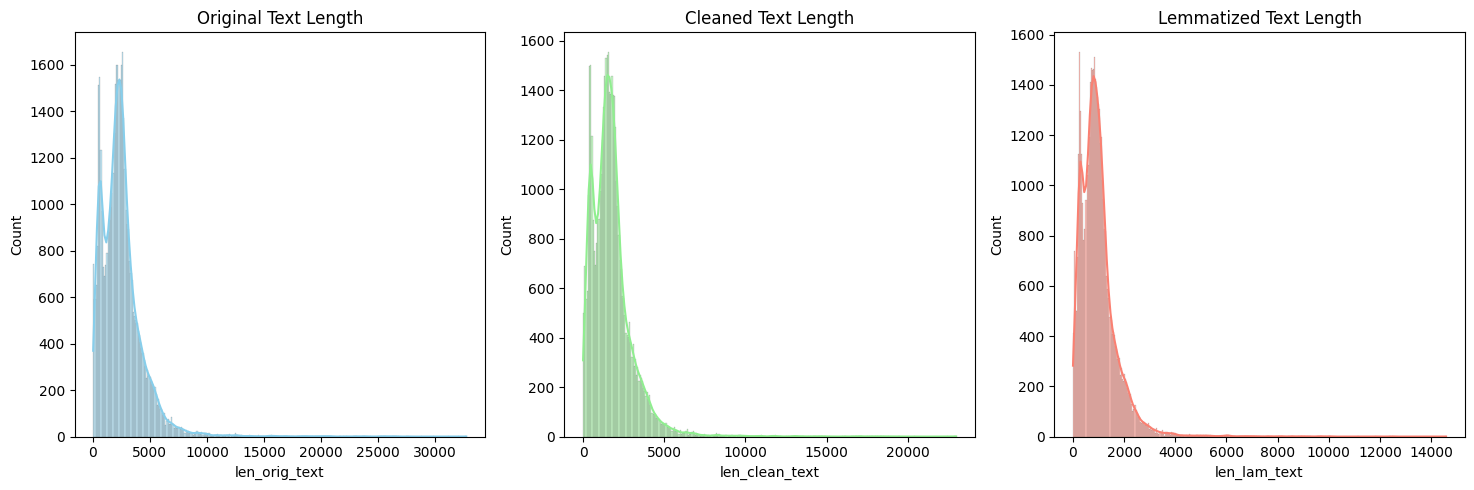

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed



fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for original text length
sns.histplot(df_clean["len_orig_text"], ax=ax[0], color='skyblue', label='Original Text', kde=True)
ax[0].set_title('Original Text Length')

# Histogram for cleaned text length
sns.histplot(df_clean["len_clean_text"], ax=ax[1], color='lightgreen', label='Cleaned Text', kde=True)
ax[1].set_title('Cleaned Text Length')

# Histogram for lemmatized text length
sns.histplot(df_clean["len_lam_text"], ax=ax[2], color='salmon', label='Lemmatized Text', kde=True)
ax[2].set_title('Lemmatized Text Length')

plt.tight_layout()
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

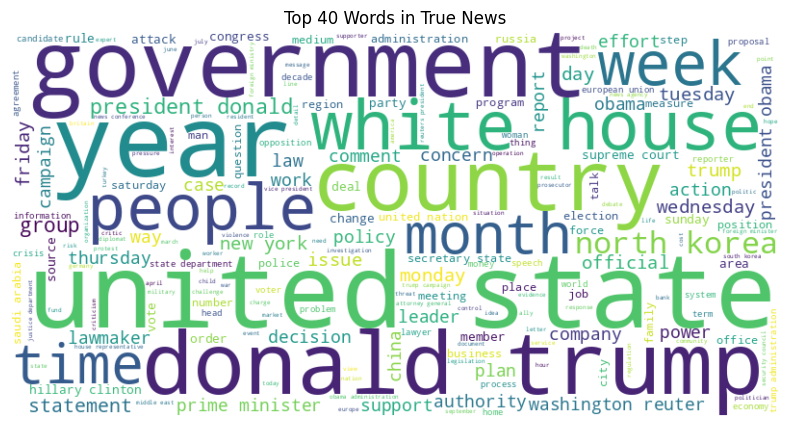

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_true_new)

plt.figure(figsize=(10, 5))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Words in True News")
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

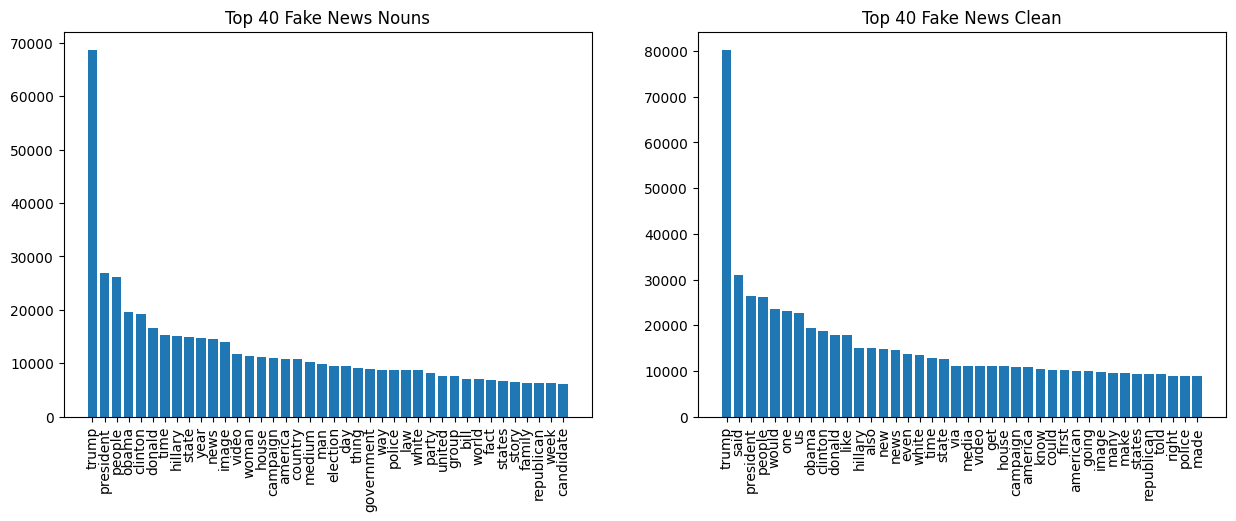

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News
# Tokenize the text
fake_word_tokens = word_tokenize(combined_fake_new)
fake_word_clean = word_tokenize(combined_fake_clean)

# Calculate word frequencies
fake_word_frequency = Counter(fake_word_tokens)
fake_clean_word_frequency = Counter(fake_word_clean)

# Get the top 40 words
fake_top_40 = fake_word_frequency.most_common(40)
fake_clean_top_40 = fake_clean_word_frequency.most_common(40)


# Plotting the top 40 words
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar([word for word, _ in fake_top_40], [freq for _, freq in fake_top_40])
ax[0].set_title("Top 40 Fake News Nouns")
ax[0].tick_params(axis='x', rotation=90)

ax[1].bar([word for word, _ in fake_clean_top_40], [freq for _, freq in fake_clean_top_40])
ax[1].set_title("Top 40 Fake News Clean")
ax[1].tick_params(axis='x', rotation=90)

plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams
def get_top_ngrams(text, n, top_n):
    if pd.isna(text) or text is None or not isinstance(text, str):  # Check for various NaN representations
        return []  # Return an empty list if text is NaN

    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, n)
    frequency = Counter(n_grams)
    return frequency.most_common(top_n)

##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data
def get_top_ngrams(text, n, top_n):
    if pd.isna(text) or text is None or not isinstance(text, str):  # Check for various NaN representations
        return []  # Return an empty list if text is NaN

    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, n)
    frequency = Counter(n_grams)
    return frequency.most_common(top_n)

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

Top Unigrams (True): [(('trump',), 42142), (('president',), 27424), (('state',), 23130), (('government',), 19854), (('year',), 18905), (('house',), 18281), (('reuters',), 17733), (('united',), 15388), (('people',), 15303), (('election',), 14421)]


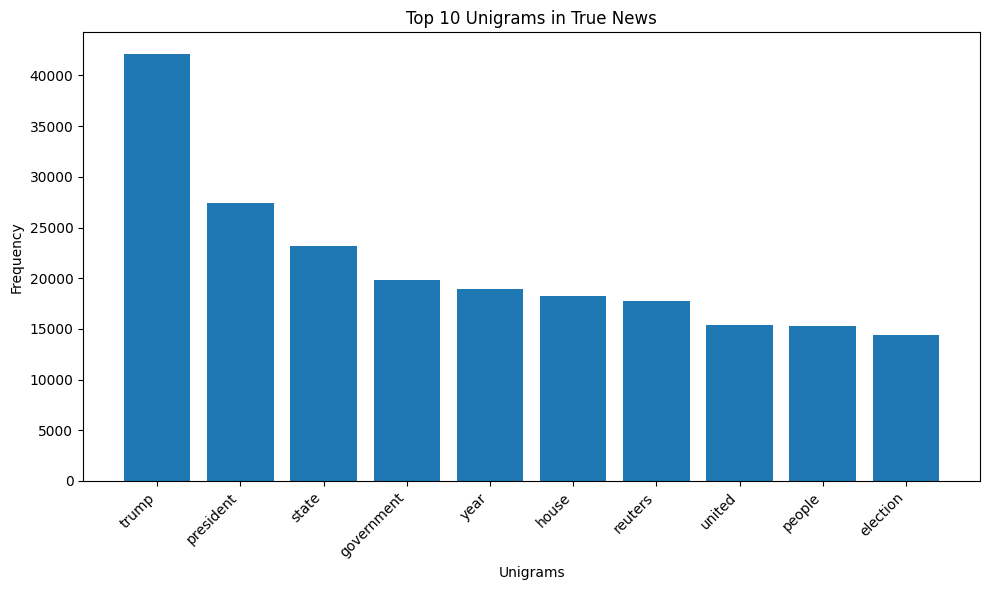

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

top_unigrams_true = get_top_ngrams(combined_true_new, 1, 10)
print("Top Unigrams (True):", top_unigrams_true)

# Extract unigrams and frequencies for plotting
unigrams = [unigram[0][0] for unigram in top_unigrams_true]
frequencies = [unigram[1] for unigram in top_unigrams_true]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(unigrams, frequencies)
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Unigrams in True News")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

Top 10 Bigrams (True News): [(('united', 'states'), 11903), (('white', 'house'), 8925), (('donald', 'trump'), 7819), (('north', 'korea'), 5950), (('president', 'donald'), 5929), (('new', 'york'), 4451), (('prime', 'minister'), 3708), (('washington', 'reuters'), 3671), (('supreme', 'court'), 2646), (('hillary', 'clinton'), 2375)]


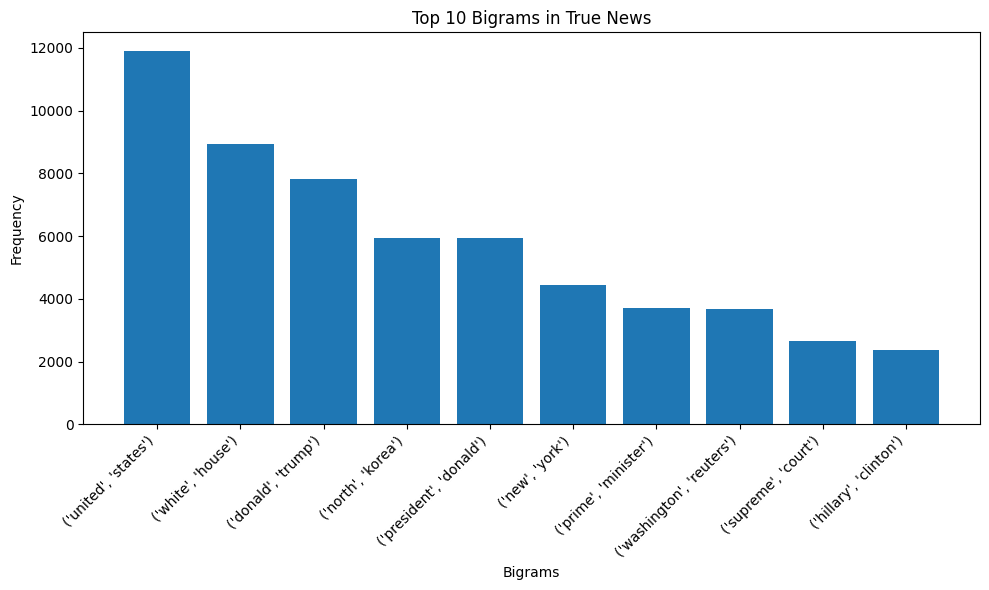

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams_true = get_top_ngrams(combined_true_new, 2, 10)
print("Top 10 Bigrams (True News):", top_bigrams_true)

# Plotting the top 10 bigrams
bigrams = [bigram[0] for bigram in top_bigrams_true]
frequencies = [bigram[1] for bigram in top_bigrams_true]

plt.figure(figsize=(10, 6))
plt.bar([str(bigram) for bigram in bigrams], frequencies) # Convert bigrams to strings for plotting
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Bigrams in True News")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

Top 10 Trigrams (True News): [(('president', 'donald', 'trump'), 4417), (('president', 'donald', 'trumps'), 1307), (('president', 'vladimir', 'putin'), 782), (('reuters', 'president', 'donald'), 725), (('washington', 'reuters', 'president'), 702), (('george', 'w', 'bush'), 605), (('washington', 'president', 'donald'), 589), (('speaker', 'paul', 'ryan'), 589), (('new', 'york', 'reuters'), 586), (('prime', 'minister', 'theresa'), 583)]


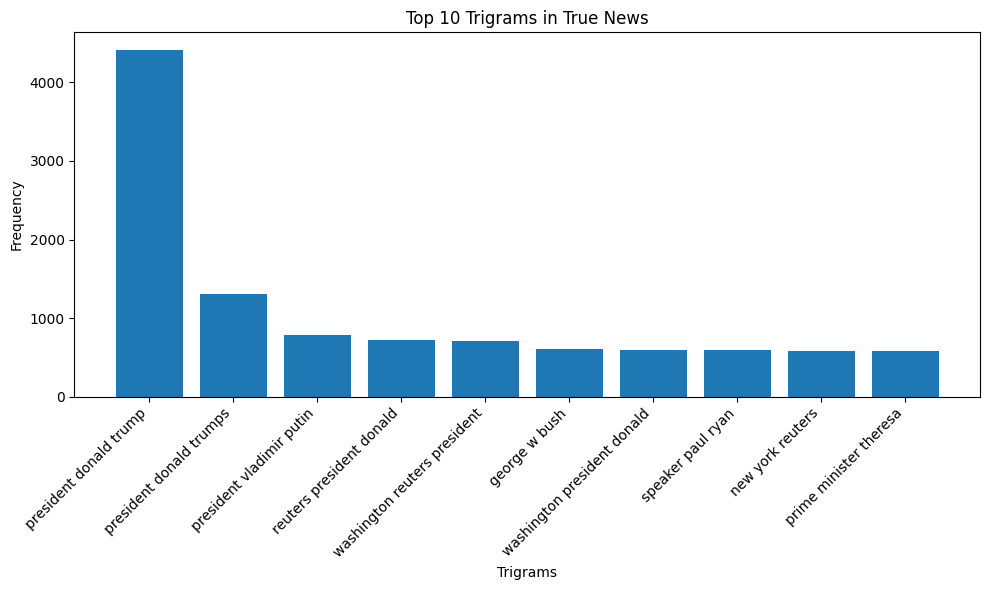

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams_true = get_top_ngrams(combined_true_new, 3, 10)
print("Top 10 Trigrams (True News):", top_trigrams_true)

# Plotting the top 10 trigrams
trigrams_noun = [" ".join(trigram[0]) for trigram in top_trigrams_true]  # Get the trigram words
frequencies_noun = [trigram[1] for trigram in top_trigrams_true] # Get the frequencies

plt.figure(figsize=(10, 6))
plt.bar(trigrams_noun, frequencies_noun)
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Trigrams in True News")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

Top Unigrams (Fake): [(('trump',), 68654), (('president',), 26898), (('people',), 26239), (('obama',), 19503), (('clinton',), 19284), (('donald',), 16594), (('time',), 15323), (('hillary',), 15160), (('state',), 14991), (('year',), 14800)]


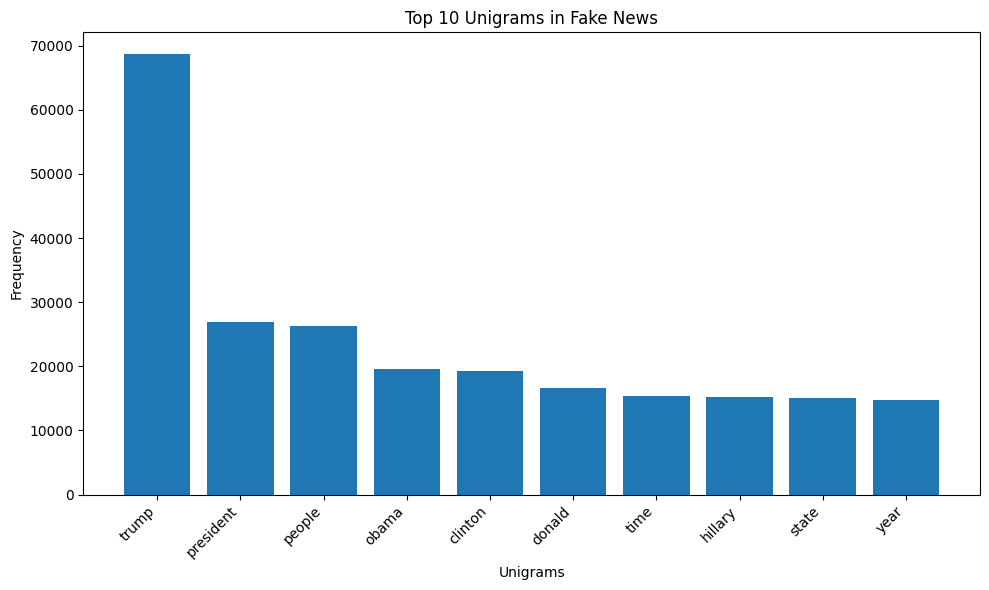

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(combined_fake_new, 1, 10)
print("Top Unigrams (Fake):", top_unigrams_fake)

unigrams = [unigram[0][0] for unigram in top_unigrams_fake]
frequencies = [unigram[1] for unigram in top_unigrams_fake]

plt.figure(figsize=(10, 6))
plt.bar(unigrams, frequencies)
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Unigrams in Fake News")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

Top Bigrams (Fake): [(('donald', 'trump'), 12558), (('hillary', 'clinton'), 6993), (('white', 'house'), 6287), (('united', 'states'), 5937), (('president', 'obama'), 4821), (('new', 'york'), 4214), (('president', 'trump'), 3478), (('fox', 'news'), 3356), (('trump', 'supporter'), 2259), (('j', 'trump'), 2115)]


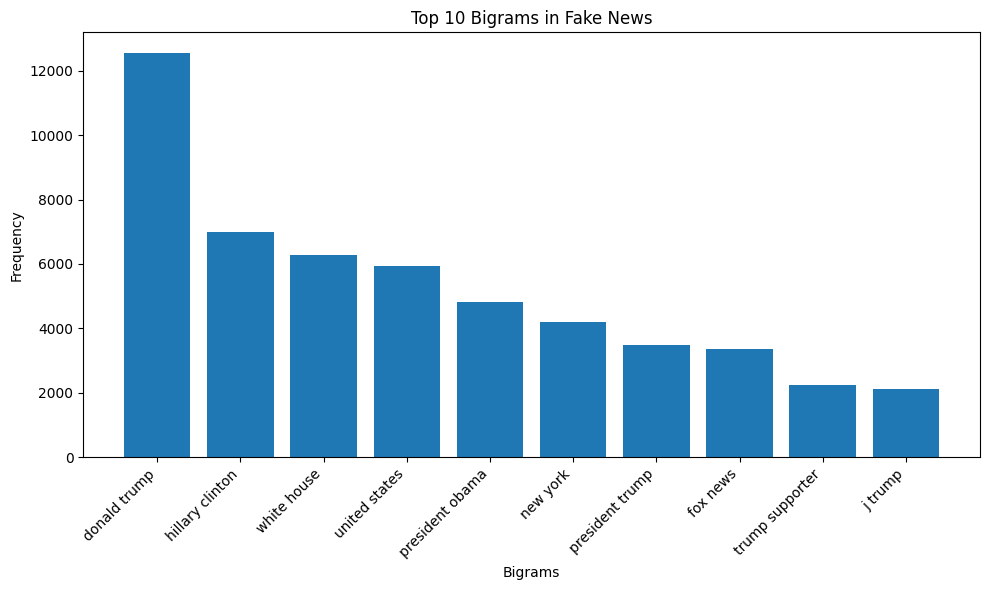

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(combined_fake_new, 2, 10)
print("Top Bigrams (Fake):", top_bigrams_fake)

# Extract bigrams and frequencies
bigrams = [" ".join(bigram[0]) for bigram in top_bigrams_fake]
frequencies = [bigram[1] for bigram in top_bigrams_fake]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(bigrams, frequencies)
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Bigrams in Fake News")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

Top Trigrams (Fake): [(('donald', 'j', 'trump'), 1799), (('j', 'trump', 'realdonaldtrump'), 1692), (('new', 'york', 'times'), 1487), (('news', 'century', 'wire'), 943), (('president', 'united', 'states'), 909), (('president', 'donald', 'trump'), 909), (('video', 'screen', 'capture'), 728), (('image', 'video', 'screen'), 683), (('new', 'york', 'city'), 609), (('george', 'w', 'bush'), 579)]


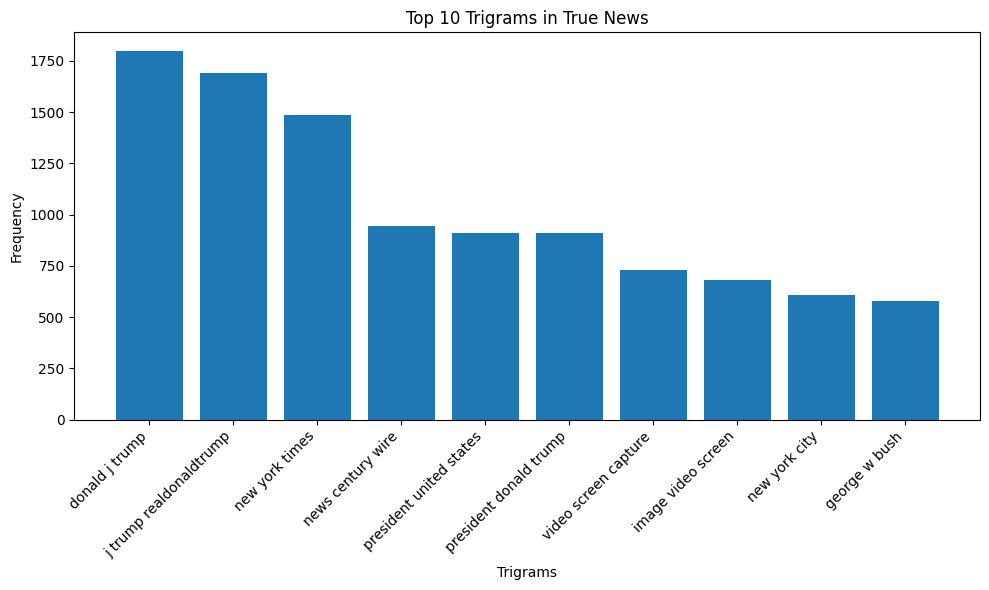

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(combined_fake_new, 3, 10)
print("Top Trigrams (Fake):", top_trigrams_fake)

trigrams_noun = [" ".join(trigram[0]) for trigram in top_trigrams_fake]
frequencies_noun = [trigram[1] for trigram in top_trigrams_fake]

plt.figure(figsize=(10, 6))
plt.bar(trigrams_noun, frequencies_noun)
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Trigrams in True News")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
# prompt: ## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
# Load the pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [ ]:
# Write your code here to extract the vectors from the Word2Vec model for both training and validation data

import numpy as np

def extract_vectors(text, model):
    vectors = []
    for word in text.split():
        if word in model:
            vectors.append(model[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(300)  # Return a zero vector if no words are found in the model




In [ ]:
# Training and validation vector
training_vectors = [extract_vectors(text, model) for text in x_train]
validation_vectors = [extract_vectors(text, model) for text in x_test]
print("Length of training vector :", len(training_vectors))
print("Length of validation vector :", len(validation_vectors))

Length of training vector : 31428
Length of validation vector : 13470


In [ ]:
#  Print some elements of training_vectors and test_vectors

print("Training vector 5 elements: \n",training_vectors[:5])
print("Validation vector 5 elements: \n",validation_vectors[:5])


Training vector 5 elements: 
 [array([ 0.00316444,  0.00985014,  0.02657377,  0.13352615, -0.07929875,
       -0.00037091,  0.00212215, -0.0899846 ,  0.07052921,  0.13516   ,
       -0.09184852, -0.08156175, -0.01594426,  0.11594801, -0.00981507,
        0.14224008,  0.1696214 ,  0.17230342, -0.01038537, -0.08041617,
       -0.0130803 ,  0.08564641,  0.01203801,  0.04156494, -0.00628193,
       -0.02913064, -0.11526607,  0.05698336,  0.0093196 , -0.00731952,
        0.04599234, -0.01795373, -0.11463811,  0.0543119 ,  0.03994516,
        0.02969595, -0.02134353,  0.12641086,  0.01340426,  0.06627479,
        0.11080229, -0.06566444,  0.16186523,  0.09082031, -0.1413903 ,
       -0.12402813, -0.01300518, -0.03055983,  0.02346567,  0.01789739,
       -0.06220539,  0.08796574, -0.04032076,  0.0034837 ,  0.02934148,
       -0.0098161 , -0.18519005, -0.10167988,  0.06621845, -0.19367863,
        0.04051443,  0.11026001, -0.00476074, -0.01761569,  0.04130672,
       -0.07447228, -0.11056519, 

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [ ]:
## Initialise Logistic Regression model
logreg_model = LogisticRegression()

## Train Logistic Regression model on training data
logreg_model.fit(training_vectors, y_train)

## Predict on validation data
validation_predictions = logreg_model.predict(validation_vectors)

In [ ]:
#  print 5 predicted and actual values also clean text

for i in range(5):
  print(f"Sample {i+1}:")
  print("Predicted:", validation_predictions[i])
  print("Actual:", y_test.iloc[i])
  print("Cleaned Text:", x_test.iloc[i][:100] + "...") # Display first 100 characters of text
  print("---")


Sample 1:
Predicted: 0
Actual: 0
Cleaned Text: fox news poll clinton beating trump points wonder donald trump accusing everything rigged polls long...
---
Sample 2:
Predicted: 0
Actual: 0
Cleaned Text: trump made millions running casinos ground trump business prowess major selling point followers tryi...
---
Sample 3:
Predicted: 1
Actual: 1
Cleaned Text: fbi probes hacks targeting phones democratic party officials sources washington reuters fbi investig...
---
Sample 4:
Predicted: 0
Actual: 0
Cleaned Text: must watch video megyn kelly spells clueless first amendment rights...
---
Sample 5:
Predicted: 1
Actual: 1
Cleaned Text: fifteen dead food aid stampede morocco ministry rabat reuters fifteen people killed five injured sta...
---


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test, validation_predictions)
precision = precision_score(y_test, validation_predictions)
recall = recall_score(y_test, validation_predictions)
f1 = f1_score(y_test, validation_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9533778767631774
Precision: 0.9475232198142415
Recall: 0.9549141965678627
F1-score: 0.9512043512043512


In [ ]:
# Classification Report
print("Classification Report logistic regression:\n\n",classification_report(y_test, validation_predictions))

Classification Report logistic regression:

               precision    recall  f1-score   support

           0       0.96      0.95      0.96      7060
           1       0.95      0.95      0.95      6410

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier()
## Train Decision Tree model on training data
dt_model.fit(training_vectors, y_train)
## Predict on validation data
dt_validation_predictions = dt_model.predict(validation_vectors)

In [ ]:
# Print some predicted and actual values
for i in range(5):
  print(f"Sample {i+1}:")
  print("Predicted:", dt_validation_predictions[i])
  print("Actual:", y_test.iloc[i])
  print("Cleaned Text:", x_test.iloc[i][:100] + "...") # Display first 100 characters of text
  print("---")

Sample 1:
Predicted: 0
Actual: 0
Cleaned Text: fox news poll clinton beating trump points wonder donald trump accusing everything rigged polls long...
---
Sample 2:
Predicted: 0
Actual: 0
Cleaned Text: trump made millions running casinos ground trump business prowess major selling point followers tryi...
---
Sample 3:
Predicted: 0
Actual: 1
Cleaned Text: fbi probes hacks targeting phones democratic party officials sources washington reuters fbi investig...
---
Sample 4:
Predicted: 0
Actual: 0
Cleaned Text: must watch video megyn kelly spells clueless first amendment rights...
---
Sample 5:
Predicted: 1
Actual: 1
Cleaned Text: fifteen dead food aid stampede morocco ministry rabat reuters fifteen people killed five injured sta...
---


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test, validation_predictions)
precision = precision_score(y_test, validation_predictions)
recall = recall_score(y_test, validation_predictions)
f1 = f1_score(y_test, validation_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9533778767631774
Precision: 0.9475232198142415
Recall: 0.9549141965678627
F1-score: 0.9512043512043512


In [ ]:
# Classification Report
print("Classification Report Decision Tree:\n\n",classification_report(y_test, dt_validation_predictions))

Classification Report Decision Tree:

               precision    recall  f1-score   support

           0       0.88      0.90      0.89      7060
           1       0.89      0.86      0.87      6410

    accuracy                           0.88     13470
   macro avg       0.88      0.88      0.88     13470
weighted avg       0.88      0.88      0.88     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Train Random Forest model on training data
rf_model.fit(training_vectors, y_train)

# Predict on validation data
rf_validation_predictions = rf_model.predict(validation_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
# Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test, rf_validation_predictions)
precision = precision_score(y_test, rf_validation_predictions)
recall = recall_score(y_test, rf_validation_predictions)
f1 = f1_score(y_test, rf_validation_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9450631031922792
Precision: 0.9454745443117536
Recall: 0.9386895475819033
F1-score: 0.9420698293408486


In [ ]:
# Classification Report
print("Classification Report Random Forest:\n\n",classification_report(y_test, rf_validation_predictions))

Classification Report Random Forest:

               precision    recall  f1-score   support

           0       0.94      0.95      0.95      7060
           1       0.95      0.94      0.94      6410

    accuracy                           0.95     13470
   macro avg       0.95      0.94      0.94     13470
weighted avg       0.95      0.95      0.95     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

Based on the analysis in the provided notebook, here's a summary of the findings:

Patterns Observed in True and Fake News:

The notebook emphasizes that distinguishing between true and fake news goes beyond just looking at the syntax or word-by-word occurrence. It suggests that true and fake news may exhibit differences in:

Semantic Content: Fake news might employ language to evoke strong emotions, use misleading framing, or promote specific agendas, while true news aims for factual reporting.
Word Usage and Context: The way words are used and the surrounding context can differ significantly. Fake news might use words in a manipulative or out-of-context manner.
Overall Narrative: Fake news stories may construct narratives that lack coherence or factual backing compared to true news.
How Semantic Classification Addressed the Problem:

Semantic classification, particularly using Word2Vec, addresses these challenges by:

Capturing Word Meanings: Word2Vec creates word embeddings that represent the semantic meaning of words. This allows the model to understand the context in which words are used.
Identifying Relationships: By understanding semantic relationships, the model can discern subtle differences in how language is used in true vs. fake news. It can identify if words are used to convey facts or to manipulate opinions.

Generalizing Beyond Keywords: Unlike simple keyword-based approaches, semantic classification can generalize to new articles that use different words but have similar underlying meanings or narratives.

Best Model and Evaluation Metric:

Best Models: Both Logistic Regression and Random Forest are the best-performing models, with very close and high accuracy (0.95). They both demonstrate a strong ability to correctly classify both true and fake news.

Poorest Model: The Decision Tree model is the least effective, with a lower accuracy (0.88) and lower precision, recall, and F1-scores compared to the other two.

Balanced Performance: Logistic Regression and Random Forest show balanced performance, with similar metrics for both Class 0 (True) and Class 1 (Fake), indicating that they don't have a bias towards either class.

In conclusion, based on these classification reports, Logistic Regression and Random Forest are the preferred models for this fake news detection task, offering superior accuracy and balanced performance. The Decision Tree, while a valid model, is less effective in this scenario.

Assessment of Approach and Impact:

Approach: The approach of using Word2Vec for semantic feature extraction combined with Logistic Regression and  Random Forest classifier is effective in leveraging both semantic information and the discriminative power of the model.

Impact: This approach has a significant positive impact on automating and improving the accuracy of fake news detection. By accurately classifying news, it can help reduce the spread of misinformation, protect public trust, and enable individuals to make more informed decisions.